In [71]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-prediction-data-simple-linear-regression/Salary_Data.csv
/kaggle/input/salary-prediction-data-simple-linear-regression/Salary Data.csv


In [28]:
import os

# List all files in the directory
directory_path = "/kaggle/input/salary-prediction-data-simple-linear-regression"
files = os.listdir(directory_path)
print("Files in the directory:")
print(files)

Files in the directory:
['Salary_Data.csv', 'Salary Data.csv']


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#setting some display niche
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

file_path = "/kaggle/input/salary-prediction-data-simple-linear-regression/Salary Data.csv"
data = pd.read_csv(file_path)

print("First few rows of the dataset")
print(data.head())


print("\nDataset Information:")
data.info()

print("\nBasic Statistics:")
print(data.describe())

print("\nMissing Values:")
print(data.isnull().sum())

First few rows of the dataset
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes

Basic Statistics:
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000

Missing Values:
YearsExperience    0
Salary             0
dtype: int64


# Some Visualizations

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


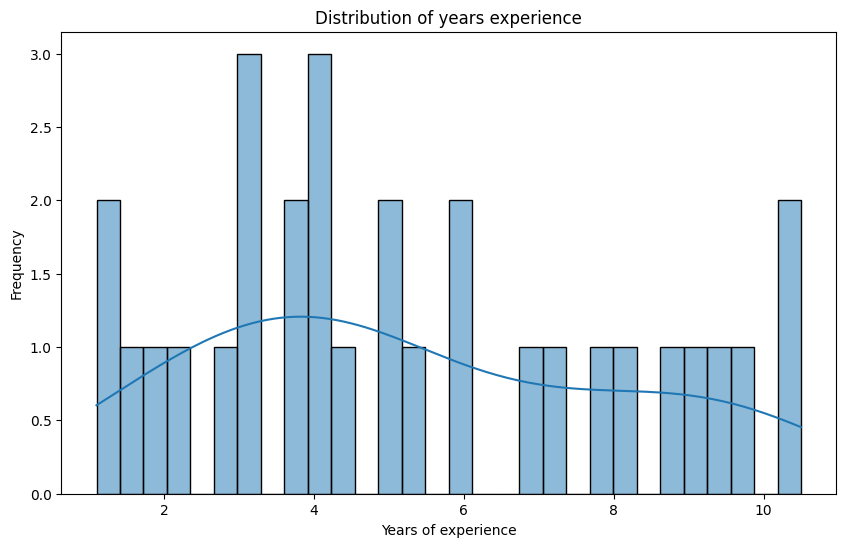

In [30]:
plt.figure(figsize=(10, 6))

sns.histplot(data['YearsExperience'], bins=30, kde=True)
plt.title('Distribution of years experience')
plt.xlabel('Years of experience')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


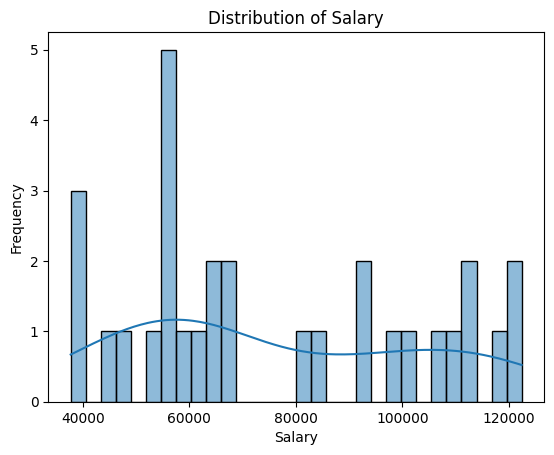

In [31]:
sns.histplot(data['Salary'], bins=30, kde=True)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

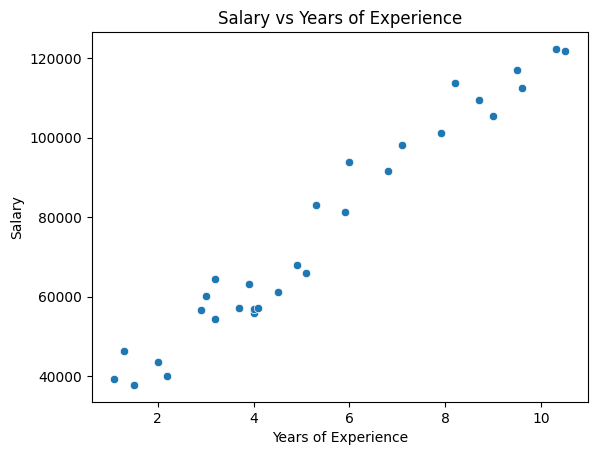

In [32]:
sns.scatterplot(x='YearsExperience', y='Salary', data=data)
plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable 

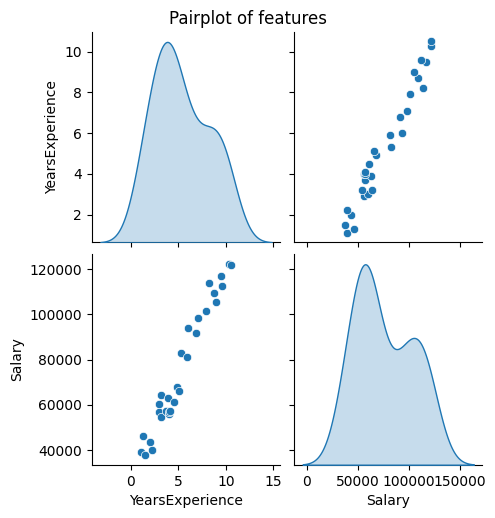

In [33]:
sns.pairplot(data, diag_kind='kde', palette='husl')
plt.suptitle('Pairplot of features', y=1.02)
plt.show()

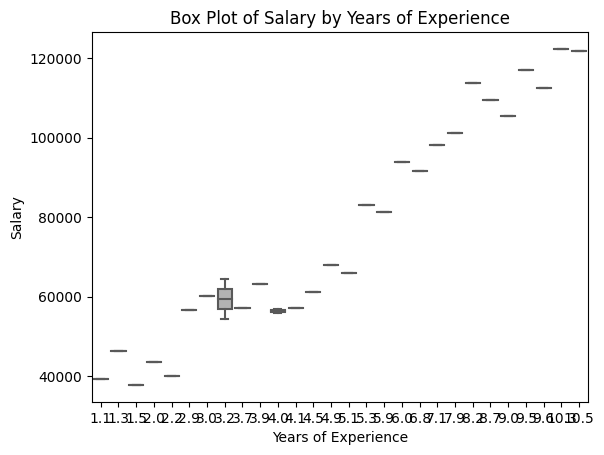

In [34]:
sns.boxplot(x='YearsExperience', y='Salary', data=data, palette='Set2')
plt.title('Box Plot of Salary by Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

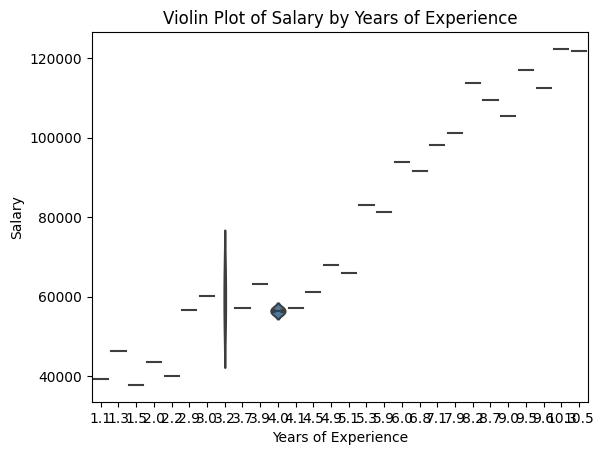

In [35]:
sns.violinplot(x='YearsExperience', y='Salary', data=data, palette='Set1', inner='quartile')
plt.title('Violin Plot of Salary by Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

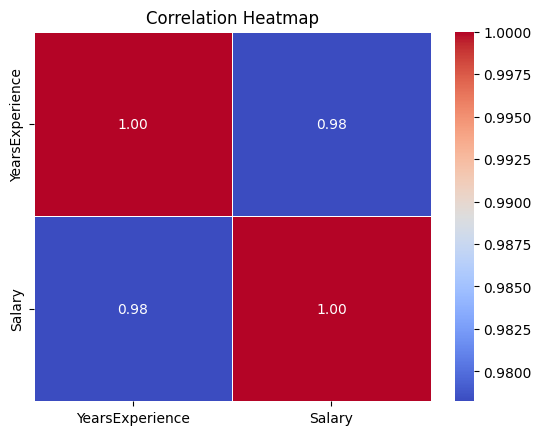

In [36]:
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

/tmp/ipykernel_29/3381131228.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='YearsExperience', y='Salary', data=data, palette='Dark2', jitter=True, alpha=0.9)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  d

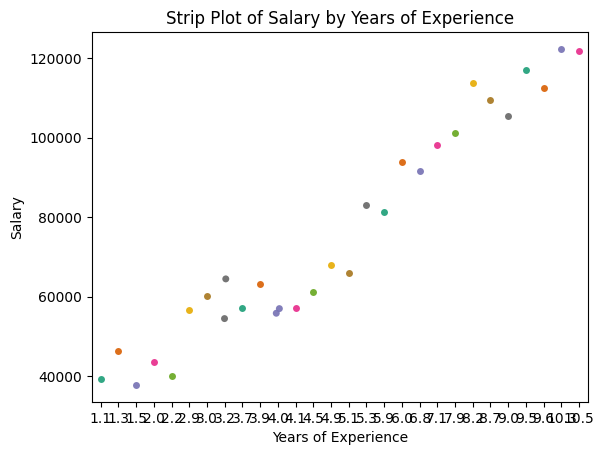

In [37]:
sns.stripplot(x='YearsExperience', y='Salary', data=data, palette='Dark2', jitter=True, alpha=0.9)
plt.title('Strip Plot of Salary by Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [38]:
#lets get the data's in a variable to preprocess them
X = data.iloc[:,:-1].values #select all rows and columns except last one column
y = data.iloc[:,-1].values #select all rows and only the last column

print(X[:5])
print(X.shape)

print(y[:5])
print(y.shape)
#again check once for null values :)
data.isnull().sum()

[[1.1]
 [1.3]
 [1.5]
 [2. ]
 [2.2]]
(30, 1)
[39343. 46205. 37731. 43525. 39891.]
(30,)


YearsExperience    0
Salary             0
dtype: int64

In [39]:
#replacing the mising values if any -> as of now not needed
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer.fit(X[:,:1])
X[:,:1] = imputer.transform(X[:,:1])

print(np.isnan(X).sum()) #to see whether we have nan in it 


0


In [15]:
#To convert categorical data to numbers for computations easily using one hot encoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct= ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')

X = np.array(ct.fit_transform(X))

#gpt explanation :)
# transformers: A list of tuples, where each tuple contains:
# A name for the transformer (e.g., 'encoder').
# The transformer itself (in this case, an instance of OneHotEncoder()).
# A list of column indices that the transformer should be applied to (in this case, [0], which indicates the first column of X).
# remainder='passthrough': This means that all other columns in X that are not specified in the transformers list will be passed through unchanged.

In [21]:
# The line y = le.fit_transform(y) effectively converts the categorical 
# target variable y into a numerical format that can be used in machine 
# learning models, making it easier to perform tasks such as classification or regression.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y=le.fit_transform(y)

#just used to encode the dependent variable

In [40]:
#Lets split the training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)
# print(X_train)
# print(y_train)

In [41]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) #don't use fit_transform again here
#just to avoid data leakage 
#very simple , we have to use the same values that we used to scale the X_train to X_test also , 


# Simple Linear Regression Model

Mean Squared Error:  39167176.62191552
R-Squared:  0.9248043441269895


Text(0, 0.5, 'Predicted Values')

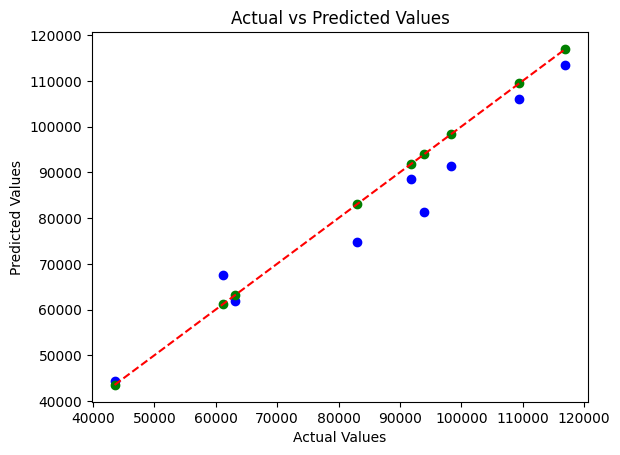

In [67]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Create an instance of the model
model = LinearRegression(learning_rate=0.01, iterations=1000)

# Fit the model to the training data, using gradient descent
model.fit(X_train, y_train)

# Make predictions to test our buddy
y_pred = model.predict(X_test)

# Calculate mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("R-Squared: ", r2)

# Plotting
# Scatter plot for actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', label='Predicted Values')  # Blue for predicted values
plt.scatter(y_test, y_test, color='green', label='Actual Values', alpha=1)  # Orange for actual values

# Reference line (y=x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')

# Titles and labels
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Mean Squared Error:  197584948.8715135
# R-Squared:  0.620663752088902

# Lasso Regression

In [ ]:
class LassoRegression:
    def __init__(self, learning_rate=0.01, iterations=1000, alpha=1.0):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.alpha = alpha  # Regularization parameter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) + self.alpha * np.sign(self.weights)
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Create an instance of the Lasso model
lasso_model = LassoRegression(learning_rate=0.01, iterations=1000, alpha=0.1)

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso_model.predict(X_test)

# Calculate metrics
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Mean Squared Error: ", mse_lasso)
print("Lasso R-Squared: ", r2_lasso)

# Plotting
plt.scatter(y_test, y_pred_lasso, color='blue', label='Predicted Values (Lasso)')
plt.scatter(y_test, y_test, color='green', label='Actual Values', alpha=0.5)

# Reference line (y=x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')

# Titles and labels
plt.title('Actual vs Predicted Values (Lasso Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [ ]:
class RidgeRegression:
    def __init__(self, learning_rate=0.01, iterations=1000, alpha=1.0):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.alpha = alpha  # Regularization parameter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) + (self.alpha / n_samples) * self.weights
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Create an instance of the Ridge model
ridge_model = RidgeRegression(learning_rate=0.01, iterations=1000, alpha=0.1)

# Fit the model to the training data
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test)

# Calculate metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Mean Squared Error: ", mse_ridge)
print("Ridge R-Squared: ", r2_ridge)

# Plotting
plt.scatter(y_test, y_pred_ridge, color='blue', label='Predicted Values (Ridge)')
plt.scatter(y_test, y_test, color='green', label='Actual Values', alpha=0.5)

# Reference line (y=x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')

# Titles and labels
plt.title('Actual vs Predicted Values (Ridge Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


In [68]:
print(model.predict(1)) #for one years of experience you salary 
print(model.predict(5)) #for five years of experience you salary 
print(model.predict(10)) #for ten years of experience you salary 
print(model.predict(20)) #for twenty years of experience you salary 
print(model.predict(30)) #for thirty years of experience you salary 

[99509.77096751]
[208266.67738249]
[344212.81040122]
[616105.07643868]
[887997.34247614]


# Results 
> > Simple Linear Regression:
> 
> Mean Squared Error:  197650079.6442067
> 
> R-Squared:  0.6205387098573043



> > Lasso:
>
> Lasso Mean Squared Error:  197649103.05730104
>
> Lasso R-Squared:  0.6205405847714345



> > Ridge:
>
> Ridge Mean Squared Error:  196408719.1125177
>
> Ridge R-Squared:  0.6229219533638836


# Lets try with Non linear approach

[[ 0.          0.09186143 -0.97981428]
 [ 0.          0.70104777 -0.50250736]
 [ 0.         -0.38195016 -0.84399524]
 [ 0.          0.32876723 -0.88134547]
 [ 0.         -0.17888805 -0.95653101]
 [ 0.          0.59951671 -0.63299065]
 [ 0.          1.51329622  1.27478182]
 [ 0.         -1.02498019  0.0499851 ]
 [ 0.          1.24254674  0.53747845]]
Mean Sqaured Error:  50475775.29529502
R-Squared:  0.903093371634435


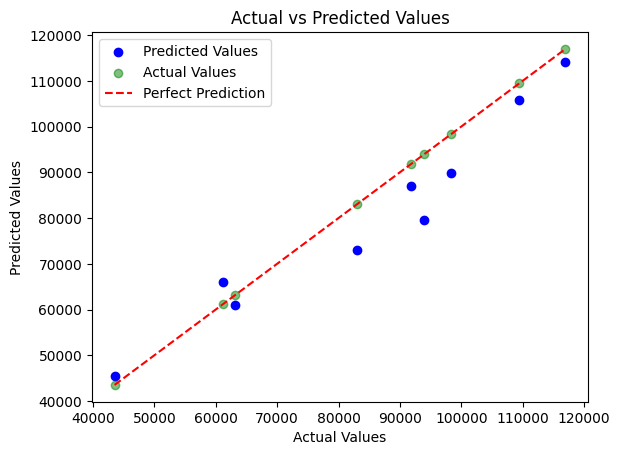

In [99]:
degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

Non_Linear_model = LinearRegression()
Non_Linear_model.fit(X_train_poly, y_train)
print(X_test_poly)
y_pred = Non_Linear_model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Sqaured Error: ", mse)
print("R-Squared: ", r2)


plt.scatter(y_test, y_pred, color='blue', label='Predicted Values')
plt.scatter(y_test, y_test, color='green', label='Actual Values', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


In [48]:
# Previous results
mse_linear = 197650079.6442067
r2_linear = 0.6205387098573043

# Non-linear regression results
mse_non_linear = 50475775.29529502
r2_non_linear = 0.903093371634435

# Calculate percentage improvement for Mean Squared Error (MSE)
mse_improvement = ((mse_linear - mse_non_linear) / mse_linear) * 100

# Calculate percentage improvement for R-Squared
r2_improvement = ((r2_non_linear - r2_linear) / r2_linear) * 100

# Print the results
print(f"Mean Squared Error Improvement: {mse_improvement:.2f}%")
print(f"R-Squared Improvement: {r2_improvement:.2f}%")


Mean Squared Error Improvement: 74.46%
R-Squared Improvement: 45.53%


# Lets try with More degrees and lets check it

[[ 0.97179725]
 [ 1.07332831]
 [-0.95729282]
 [-1.19419861]
 [ 1.34407779]
 [-0.68654333]
 [ 0.29492354]
 [-0.31426279]
 [-0.61885596]
 [ 1.54713991]
 [-1.26188599]
 [ 0.02417406]
 [-1.32957336]
 [-0.04351331]
 [ 1.85173307]
 [ 1.7840457 ]
 [-0.44963754]
 [-0.61885596]
 [-0.34810648]
 [-0.34810648]
 [-0.72038702]]
[[ 0.          0.09186143 -0.97981428 -0.26033226]
 [ 0.          0.70104777 -0.50250736 -0.10378195]
 [ 0.         -0.38195016 -0.84399524 -0.28606047]
 [ 0.          0.32876723 -0.88134547 -0.24450243]
 [ 0.         -0.17888805 -0.95653101 -0.26329223]
 [ 0.          0.59951671 -0.63299065 -0.16255722]
 [ 0.          1.51329622  1.27478182  1.31751149]
 [ 0.         -1.02498019  0.0499851  -0.75106863]
 [ 0.          1.24254674  0.53747845  0.61294466]]
[ 73567.62572842  92548.0182088   59790.20916256  80922.82551597
  65478.70683538  89401.28011579 115070.9112049   45303.88326372
 108302.39066718]
Mean Sqaured Error:  37465285.88184661
R-Squared:  0.9280717430426437


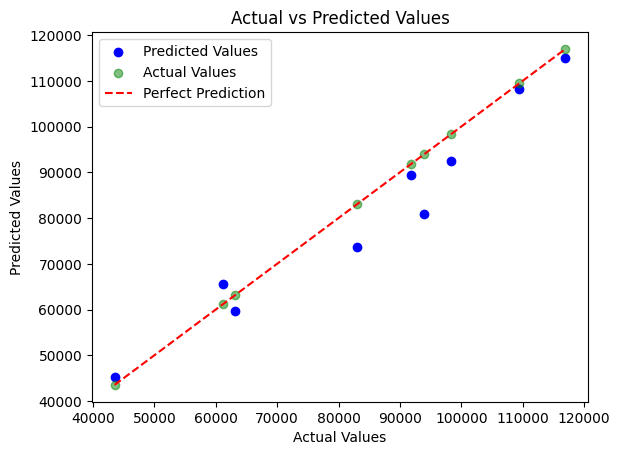

In [94]:
degree = 3
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

Non_Linear_model = LinearRegression()
Non_Linear_model.fit(X_train_poly, y_train)

y_pred = Non_Linear_model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(X_train)
print(X_test_poly)
print(y_pred)
print("Mean Sqaured Error: ", mse)
print("R-Squared: ", r2)


plt.scatter(y_test, y_pred, color='blue', label='Predicted Values')
plt.scatter(y_test, y_test, color='green', label='Actual Values', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


# Lets try Ridge and Lasso also with non linear approach it may decrease the overfittting a bit

In [61]:
from sklearn.linear_model import Ridge, Lasso
#code was pulled from chatgpt for quick review of the prcess , don't worry this fine...same lines of code only, just use ridge
# Step 2: Ridge Regression with polynomial features
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_poly, y_train)
y_pred_ridge_poly = ridge_model.predict(X_test_poly)

# Calculate metrics for Ridge
mse_ridge_poly = mean_squared_error(y_test, y_pred_ridge_poly)
r2_ridge_poly = r2_score(y_test, y_pred_ridge_poly)

print("Ridge Regression with Polynomial Features")
print("Mean Squared Error: ", mse_ridge_poly)
print("R-Squared: ", r2_ridge_poly)

# Step 3: Lasso Regression with polynomial features
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_poly, y_train)
y_pred_lasso_poly = lasso_model.predict(X_test_poly)

# Calculate metrics for Lasso
mse_lasso_poly = mean_squared_error(y_test, y_pred_lasso_poly)
r2_lasso_poly = r2_score(y_test, y_pred_lasso_poly)

print("Lasso Regression with Polynomial Features")
print("Mean Squared Error: ", mse_lasso_poly)
print("R-Squared: ", r2_lasso_poly)

Ridge Regression with Polynomial Features
Mean Squared Error:  72777042.27375886
R-Squared:  0.8602779700181138
Lasso Regression with Polynomial Features
Mean Squared Error:  37504991.08893118
R-Squared:  0.9279955144414065


# Conclusion
1. There ain't much improvement with lass or ridge
2. Non-linear without regularization works really well.

In [104]:
#Lets try to find salary for some input values , we are already
#did this above with simple linear regression one more lets try 
#and see the improved values some
# Simple Linear Regression answers
# print(model.predict(1)) #for one years of experience you salary 
# print(model.predict(5)) #for five years of experience you salary 
# print(model.predict(10)) #for ten years of experience you salary 
# print(model.predict(20)) #for twenty years of experience you salary 
# print(model.predict(30)) #for thirty years of experience you salary 

# [99509.77096751]
# [208266.67738249]
# [344212.81040122]
# [616105.07643868]
# [887997.34247614]

# Transform and scale years of experience
def predict_salary(years):
    # Transform the input years using polynomial features
    years_transformed = poly.transform(np.array([[years]]))
    # Scale the transformed features
    years_scaled = scaler.transform(years_transformed)
#     print(years_scaled)
    # Predict salary using the non-linear model
    return Non_Linear_model.predict(years_scaled)

# Example predictions
print("One year experience salary: ", predict_salary(1.0)[0])
print("Five year experience salary: ", predict_salary(5.0)[0])
print("Ten year experience salary: ", predict_salary(10.0)[0])
print("Twenty year experience salary: ", predict_salary(20.0)[0])
print("Thirty year experience salary: ", predict_salary(30.0)[0])

# Simple linear answers
# [99509.77096751]
# [208266.67738249]
# [344212.81040122]
# [616105.07643868]
# [887997.34247614]
# Non linear approach answers
# One year experience salary:  98583.12146590343
# Five year experience salary:  242651.82317841332
# Ten year experience salary:  495920.6050357312
# Twenty year experience salary:  1246401.1844726354
# Thirty year experience salary:  2322139.118205897

#Thank you for coming this much out


One year experience salary:  98583.12146590343
Five year experience salary:  242651.82317841332
Ten year experience salary:  495920.6050357312
Twenty year experience salary:  1246401.1844726354
Thirty year experience salary:  2322139.118205897


In [109]:
from sklearn.metrics import mean_absolute_error

y_pred = Non_Linear_model.predict(X_test_poly)  # Predictions on the test set
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 5900.148580300901


> This means in the calculated salaries an approx error of 5900 could be there, either increase or decrease in salary, this amount is pretty okay compared to the overall amount, we can reduce this in half and remove it or kinda like something we can do at the end. Thank you